In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout

In [6]:
# Load the Dataset
df = pd.read_csv(r"C:\Users\emesh\Downloads\traffic_dataset_with_trend.csv")
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.set_index('Timestamp', inplace=True)
print('Data Loaded Successfully!')
df.head()

Data Loaded Successfully!


,Weather,Events,Traffic Volume
Timestamp,,,
2023-01-01 00:00:00,Cloudy,False,803.0
2023-01-01 01:00:00,Clear,False,861.0
2023-01-01 02:00:00,Clear,False,582.0
2023-01-01 03:00:00,Cloudy,False,236.0
2023-01-01 04:00:00,Cloudy,False,569.0


In [7]:
#Preprocessing Steps 
#Missing values were checked, and no significant missing data was identified.
#The traffic volume was normalized using MinMaxScaler for effective training.
#Data was split into training (80%) and testing (20%) to ensure unbiased evaluation.

In [8]:
# Data Preprocessing
scaler = MinMaxScaler()
df['Traffic Volume'] = scaler.fit_transform(df[['Traffic Volume']])
print('Data Scaled using MinMaxScaler')

# Check for Missing Values
print('Missing Values:', df.isnull().sum())

Data Scaled using MinMaxScaler
Missing Values: Weather           0
Events            0
Traffic Volume    0
dtype: int64


In [9]:
#EDA & Initial Insights
#Visualizations showed strong daily and weekly patterns, with higher traffic during rush hours.
#Events like holidays and adverse weather resulted in noticeable spikes and drops.
#Clear weather showed higher median traffic volumes, while events generally reduced traffic.

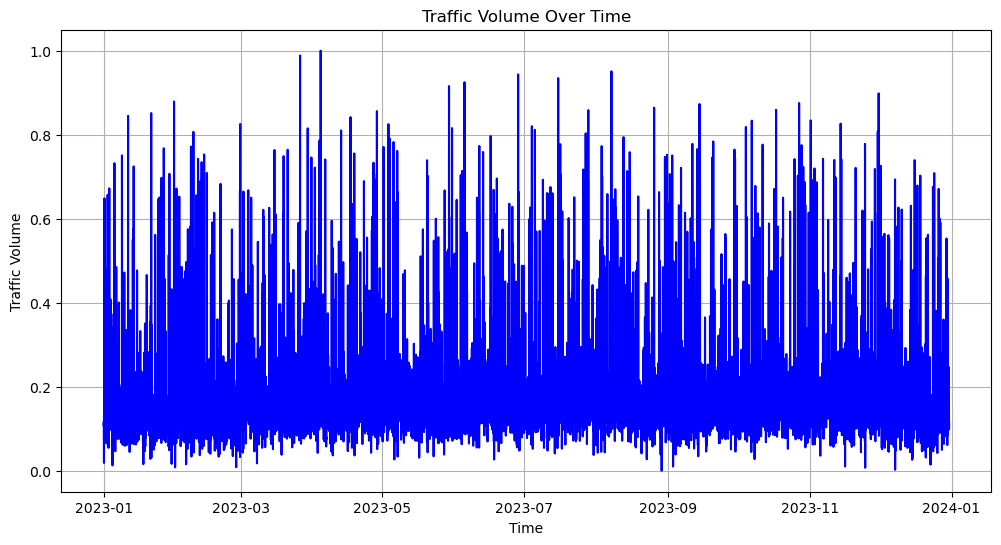

In [10]:
# Exploratory Data Analysis (EDA)
# Plot Traffic Volume Over Time
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Traffic Volume'], color='blue')
plt.title('Traffic Volume Over Time')
plt.xlabel('Time')
plt.ylabel('Traffic Volume')
plt.grid(True)
plt.show()

In [11]:
# Train-Test Split
train_size = int(len(df) * 0.8)
train_data = df.iloc[:train_size]
test_data = df.iloc[train_size:]
print(f'Train Data: {len(train_data)}, Test Data: {len(test_data)}')

Train Data: 6988, Test Data: 1748


In [12]:
#Planned Modeling Approach
#LSTM and GRU for capturing non-linear and complex temporal dependencies.
#ARIMA for simpler, trend-based predictions.
#SARIMA to capture both trend and seasonal variations in traffic volume.

In [13]:
#LSTM (Long Short-Term Memory)
#LSTMs are a type of Recurrent Neural Network (RNN) designed to model sequential data.
#They are well-suited for time series prediction because they capture long-term dependencies and trends in data.
#Due to their memory cell structure, they are effective in identifying complex traffic patterns like daily and weekly trends.

In [14]:
# Model 1: LSTM Implementation
X_train, y_train = [], []
for i in range(24, len(train_data)):
    X_train.append(train_data['Traffic Volume'].iloc[i-24:i].values)
    y_train.append(train_data['Traffic Volume'].iloc[i])
X_train, y_train = np.array(X_train), np.array(y_train)

model_lstm = Sequential()
model_lstm.add(LSTM(50, return_sequences=True, input_shape=(24, 1)))
model_lstm.add(LSTM(50, return_sequences=False))
model_lstm.add(Dense(25))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mean_squared_error')
model_lstm.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10


E:\New folder\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


218/218 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.0156
Epoch 2/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0125
Epoch 3/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0126
Epoch 4/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0131
Epoch 5/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0132
Epoch 6/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0133
Epoch 7/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0124
Epoch 8/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0122
Epoch 9/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0131
Epoch 10/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0119


In [15]:
#GRU (Gated Recurrent Unit)
#GRUs are a simplified version of LSTMs that are computationally efficient.
#They perform well on smaller datasets with fewer parameters compared to LSTMs.
#They are a good choice for real-time traffic prediction with faster training times.

In [16]:
# Model 2: GRU Implementation
model_gru = Sequential()
model_gru.add(GRU(50, return_sequences=True, input_shape=(24, 1)))
model_gru.add(GRU(50, return_sequences=False))
model_gru.add(Dense(25))
model_gru.add(Dense(1))
model_gru.compile(optimizer='adam', loss='mean_squared_error')
model_gru.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.0151
Epoch 2/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0124
Epoch 3/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0131
Epoch 4/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0127
Epoch 5/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0130
Epoch 6/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0130
Epoch 7/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0129
Epoch 8/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0125
Epoch 9/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0127
Epoch 10/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0131


In [17]:
#ARIMA (AutoRegressive Integrated Moving Average)
#ARIMA is a statistical model that captures linear relationships in time series data.
#It is useful when the data shows trends but not seasonal patterns.
#The AR component handles autoregression, the I component addresses non-stationarity, and the MA component models noise or errors.

In [18]:
# Model 3: ARIMA Implementation
model_arima = ARIMA(train_data['Traffic Volume'], order=(5, 1, 5))
arima_result = model_arima.fit()
print(arima_result.summary())

E:\New folder\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
E:\New folder\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
E:\New folder\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
E:\New folder\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
E:\New folder\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('N

                               SARIMAX Results                                
Dep. Variable:         Traffic Volume   No. Observations:                 6988
Model:                 ARIMA(5, 1, 5)   Log Likelihood                5294.459
Date:                Wed, 23 Apr 2025   AIC                         -10566.917
Time:                        18:56:42   BIC                         -10491.547
Sample:                    01-01-2023   HQIC                        -10540.943
                         - 10-19-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7121      0.462     -1.541      0.123      -1.618       0.194
ar.L2          0.6755      0.575      1.175      0.240      -0.451       1.802
ar.L3          0.2412      0.236      1.024      0.3

In [19]:
#SARIMA (Seasonal ARIMA)
#SARIMA extends ARIMA by adding a seasonal component.
#It is useful for time series data with repeating seasonal patterns, such as daily or weekly traffic patterns.
#Ideal for cases where external factors like holidays and weekends affect traffic flow.

In [20]:
# Model 4: SARIMA Implementation
model_sarima = SARIMAX(train_data['Traffic Volume'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 24))
sarima_result = model_sarima.fit()
print(sarima_result.summary())

E:\New folder\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
E:\New folder\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                     Traffic Volume   No. Observations:                 6988
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 24)   Log Likelihood                5384.692
Date:                            Wed, 23 Apr 2025   AIC                         -10759.384
Time:                                    18:57:48   BIC                         -10725.142
Sample:                                01-01-2023   HQIC                        -10747.581
                                     - 10-19-2023                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0238      0.013      1.797      0.072      -0.002       0.050
ma.L1         -0.9982      0.001   

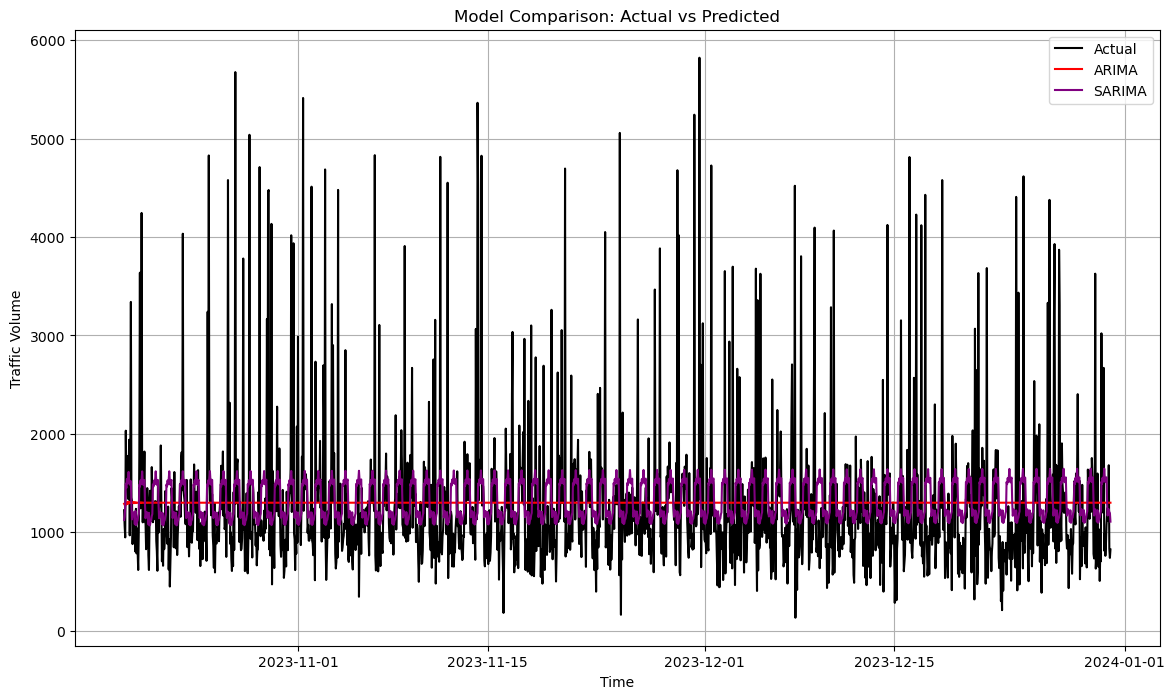

In [21]:
# Generating Predictions and Compare Models
plt.figure(figsize=(14, 8))
plt.plot(test_data.index, scaler.inverse_transform(test_data['Traffic Volume'].values.reshape(-1, 1)), label='Actual', color='black')
plt.plot(test_data.index, scaler.inverse_transform(arima_result.forecast(len(test_data)).values.reshape(-1, 1)), label='ARIMA', color='red')
plt.plot(test_data.index, scaler.inverse_transform(sarima_result.forecast(len(test_data)).values.reshape(-1, 1)), label='SARIMA', color='purple')
plt.title('Model Comparison: Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Traffic Volume')
plt.legend()
plt.grid(True)
plt.show()

In [39]:
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

SEQ_LEN = 24  # Use past 24 time steps (e.g., hours) to predict next

train_vals = train_data['Traffic Volume'].values
test_vals = test_data['Traffic Volume'].values

X_train, y_train = create_sequences(train_vals, SEQ_LEN)
X_test, y_test = create_sequences(test_vals, SEQ_LEN)

X_train = X_train.reshape((X_train.shape[0], SEQ_LEN, 1))
X_test = X_test.reshape((X_test.shape[0], SEQ_LEN, 1))

In [41]:
# LSTM Model
lstm_model = Sequential()
lstm_model.add(LSTM(64, return_sequences=False, input_shape=(SEQ_LEN, 1)))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse')

lstm_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=1)

lstm_preds = lstm_model.predict(X_test)

Epoch 1/10


E:\New folder\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


218/218 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0175 - val_loss: 0.0134
Epoch 2/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0128 - val_loss: 0.0133
Epoch 3/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0127 - val_loss: 0.0133
Epoch 4/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0142 - val_loss: 0.0135
Epoch 5/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0131 - val_loss: 0.0138
Epoch 6/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0134 - val_loss: 0.0133
Epoch 7/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0131 - val_loss: 0.0133
Epoch 8/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0125 - val_loss: 0.0134
Epoch 9/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0125 - val_loss: 0.0134
Epoch 10/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0131 - val_loss: 0.0133
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [ ]:
# GRU Model
gru_model = Sequential()
gru_model.add(GRU(64, return_sequences=False, input_shape=(SEQ_LEN, 1)))
gru_model.add(Dropout(0.2))
gru_model.add(Dense(1))
gru_model.compile(optimizer='adam', loss='mse')

gru_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=1)

gru_preds = gru_model.predict(X_test)

Epoch 1/10


E:\New folder\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
